In [7]:
import os
import pathlib
import pandas as pd
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [8]:
!pip install ktrain
import ktrain
from ktrain import text
MODEL_NAME="Musixmatch/umberto-commoncrawl-cased-v1"

In [9]:
train_path= "../input/dati-di-training-e-di-test/haspeede2_dev_taskAB.csv"
test_path="../input/dati-di-training-e-di-test/haspeede2_reference_taskAB(misto).csv"
tr_path=pathlib.Path(train_path)
te_path=pathlib.Path(test_path)
if tr_path.exists():
    print("Train data path set.")
else:
    raise SystemExit("Training Data Path does not exist.")

if te_path.exists():
    print("Test data path set.")
else:
    raise SystemExit("Test Data Path does not exist.")

Train data path set.
Test data path set.


In [10]:
train_df= pd.read_csv(train_path, encoding='utf-8', sep="\t", header=None)
train_df=train_df.drop([0])
train_df.head()

,0,1,2,3
1,2066,"È terrorismo anche questo, per mettere in uno ...",0,0
2,2045,@user @user infatti finché ci hanno guadagnato...,0,0
3,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0
4,1259,"@user ad uno ad uno, perché quando i migranti ...",0,0
5,949,Il divertimento del giorno? Trovare i patrioti...,0,0


In [11]:
test_df= pd.read_csv(test_path, encoding='utf-8', sep=";",header=None)
test_df.head()

,0,1,2,3
0,11834,@user A me pare una scelta politica suicida pu...,1,0
1,12113,@user e' un perfetto musulmano!!! chi dice il ...,1,1
2,11770,Mai Tg e i giornaloni hanno parlato di questa ...,1,1
3,11937,@user Ipocriti farabutti. Fanno morire i terre...,1,1
4,11870,@user @user @user L'IMMIGRAZIONE C'E' STATO UN...,1,1


In [12]:
x_train=train_df[1].tolist()
y_train=train_df[2].tolist()
x_test=test_df[1].tolist()
y_test=test_df[2].tolist()


t=text.Transformer(MODEL_NAME,maxlen=100)
trn=t.preprocess_train(x_train,y_train)
val=t.preprocess_test(x_test,y_test)

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

preprocessing train...
language: it
train sequence lengths:
	mean : 23
	95percentile : 45
	99percentile : 50


Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: it
test sequence lengths:
	mean : 29
	95percentile : 48
	99percentile : 53


404 Client Error: Not Found for url: https://huggingface.co/Musixmatch/umberto-commoncrawl-cased-v1/resolve/main/tf_model.h5
/opt/conda/lib/python3.7/site-packages/ktrain/text/preprocessor.py:1067: UserWarning: Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn('Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. ' +\


Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
213/213 [==============================] - 102s 383ms/step - loss: 0.6885 - accuracy: 0.5478
Epoch 2/10
213/213 [==============================] - 83s 392ms/step - loss: 0.6420 - accuracy: 0.6266
Epoch 3/10
213/213 [==============================] - 83s 389ms/step - loss: 0.4898 - accuracy: 0.7668
Epoch 4/10
213/213 [==============================] - 83s 389ms/step - loss: 0.4360 - accuracy: 0.7962
Epoch 5/10
213/213 [==============================] - 83s 389ms/step - loss: 0.6501 - accuracy: 0.6123
Epoch 6/10
213/213 [==============================] - 83s 388ms/step - loss: 0.6835 - accuracy: 0.5847
Epoch 7/10
213/213 [==============================] - 78s 368ms/step - loss: 3.4924 - accuracy: 0.5465


done.
Visually inspect loss plot and select learning rate associated with falling loss


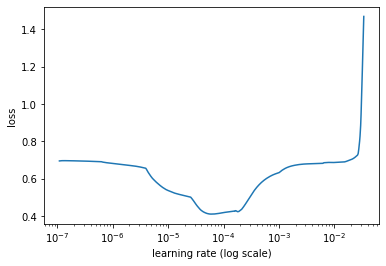



begin training using triangular learning rate policy with max lr of 0.0002...
Epoch 1/10
214/214 [==============================] - 108s 434ms/step - loss: 0.6276 - accuracy: 0.6354 - val_loss: 0.7062 - val_accuracy: 0.5445
Epoch 2/10
214/214 [==============================] - 92s 422ms/step - loss: 0.6727 - accuracy: 0.5935 - val_loss: 0.6595 - val_accuracy: 0.6222
Epoch 3/10
214/214 [==============================] - 92s 422ms/step - loss: 0.6781 - accuracy: 0.5931 - val_loss: 0.6934 - val_accuracy: 0.5445
Epoch 4/10
214/214 [==============================] - 92s 423ms/step - loss: 0.6784 - accuracy: 0.5954 - val_loss: 0.6943 - val_accuracy: 0.5445
Epoch 5/10
214/214 [==============================] - 92s 422ms/step - loss: 0.6756 - accuracy: 0.5950 - val_loss: 0.6936 - val_accuracy: 0.5445
Epoch 6/10
214/214 [==============================] - 92s 422ms/step - loss: 0.6770 - accuracy: 0.5949 - val_loss: 0.6947 - val_accuracy: 0.5445
Epoch 7/10
214/214 [=============================

array([[720, 240],
       [426, 377]])

In [13]:
model=t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

learner.lr_find(show_plot=True,max_epochs=10)
learner.autofit(2e-4,early_stopping=5,epochs=10)
learner.validate(class_names=t.get_classes())

In [14]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

data=test_df[1].tolist()
label=test_df[2].tolist()

i = 0
correct = 0
wrong = 0
total = len(data)
true_lab = []
pred_lab = []
text = []
for dt in data:
    result = predictor.predict(dt)
    if not int(result) == label[i]:
        text.append(dt)
        pred_lab.append(result)
        true_lab.append(label[i])
        wrong += 1
    else:
        correct += 1

    i += 1

In [15]:
name_dict = {
    'Name': text,
    'Gold Label': true_lab,
    'Predicted Label': pred_lab
}

wrong_data = pd.DataFrame(name_dict)

wrong_data.to_csv("wrong_results.csv", sep=';')

print("Correct: ", correct,"/",total,"\nWrong: ", wrong,"/",total)

Correct:  1097 / 1763 
Wrong:  666 / 1763
